In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../../csv_data/use/00_real_real_real_real_true_data.csv', thousands=",",encoding='cp949')
df = df[['회사명','거래소코드','회계년도','총자본영업이익율','자기자본순이익율','유동자산회전율','총자본투자효율','매출채권회전율','총자본회전율',
         '유형자산회전율','매출액총이익율','순운전자본비율','재고자산_대_유동자산비율','총자산증가율','유동비율',
         '매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부',
         '투자활동감소율여부','기업수명주기','회생기업2']] # 3년 연속 피쳐들

# df = df[['회사명','거래소코드','회계년도','종업원1인당부가가치', '순운전자본비율', '자기자본순이익율', '총자본투자효율', 
#          '기계장비율', '유동비율', '총자본영업이익율', '유동자산회전율', '유형자산회전율', '매출액총이익율',
#         '매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부',
#         '기업수명주기','회생기업2']] # 전체 피쳐들
# df['회계년도'] = pd.to_datetime(df['회계년도'], format='%d-%b').dt.strftime('20%d%m')
# df['거래소코드'] = df['거래소코드'].astype(str).str.zfill(6)
df['회생기업2'] = df['회생기업2'].fillna(0)
df['거래소코드'] = df['거래소코드'].astype(int)
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df['회계년도'] = df['회계년도'].astype(int)
df

,회사명,거래소코드,회계년도,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,...,총자산증가율,유동비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,회생기업2
0,(주)CMG제약,58820,201112,2.37,-8.28,1.25,12.72,2.29,0.66,1.77,...,1.98,200.97,1,0,0,0,0,0,1,0
1,(주)디아크,78590,201112,0.00,45.64,4.62,0.00,8.99,2.57,6.86,...,13.04,111.87,0,0,0,0,0,0,4,0
2,(주)옵트론텍,82210,201112,7.53,11.09,1.34,16.57,3.48,0.64,1.72,...,3.11,91.68,0,0,0,0,0,1,3,0
3,상신이디피(주),91580,201112,11.58,15.46,3.75,34.58,9.93,1.56,2.84,...,11.97,100.91,0,0,0,0,0,0,2,0
4,(주)오픈베이스,49480,201112,2.82,3.60,2.02,31.80,5.26,1.55,22.67,...,1.83,167.53,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,(주)에스에이엠티,31330,201912,11.10,16.62,6.21,18.71,11.60,4.00,97.11,...,-11.14,365.27,0,0,0,0,0,0,3,1
8744,에스디엔(주),99220,201912,2.34,5.59,1.49,10.72,2.55,0.51,1.97,...,15.14,99.21,0,0,0,0,0,1,2,0
8745,(주)에스에이티,60540,201912,7.74,11.20,2.61,27.48,10.12,1.08,3.22,...,9.86,152.28,0,0,0,0,0,0,2,0
8746,(주)에스비에스,34120,201912,1.14,3.44,1.35,26.18,3.00,0.74,2.65,...,30.29,182.42,0,1,0,0,0,0,5,1


### 피쳐와 레이블 나누기

In [3]:
# data = df.iloc[:,1:20]
# target = df.iloc[:,20]

In [4]:
target = df.iloc[:,22]

In [5]:
target

0       0
1       0
2       0
3       0
4       0
       ..
8743    1
8744    0
8745    0
8746    1
8747    0
Name: 회생기업2, Length: 8748, dtype: int64

In [6]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '총자본영업이익율', '자기자본순이익율', '유동자산회전율', '총자본투자효율',
       '매출채권회전율', '총자본회전율', '유형자산회전율', '매출액총이익율', '순운전자본비율', '재고자산_대_유동자산비율',
       '총자산증가율', '유동비율', '매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부',
       '자본증가율여부', '투자활동감소율여부', '기업수명주기', '회생기업2'],
      dtype='object')

### 스케일링을 위해 데이터를 나눠줍니다

In [7]:
# 기간을 얼마나 나누게 될까요~?
x_train = df.loc[:5610] # 2011 ~ 2016년
x_test = df.loc[5611:] # 2017 ~ 2019년
y_train = target.loc[:5610] # 2011 ~ 2016년
y_test = target.loc[5611:] # 2017 ~ 2019년

In [8]:
x_train

,회사명,거래소코드,회계년도,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,...,총자산증가율,유동비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,회생기업2
0,(주)CMG제약,58820,201112,2.37,-8.28,1.25,12.72,2.29,0.66,1.77,...,1.98,200.97,1,0,0,0,0,0,1,0
1,(주)디아크,78590,201112,0.00,45.64,4.62,0.00,8.99,2.57,6.86,...,13.04,111.87,0,0,0,0,0,0,4,0
2,(주)옵트론텍,82210,201112,7.53,11.09,1.34,16.57,3.48,0.64,1.72,...,3.11,91.68,0,0,0,0,0,1,3,0
3,상신이디피(주),91580,201112,11.58,15.46,3.75,34.58,9.93,1.56,2.84,...,11.97,100.91,0,0,0,0,0,0,2,0
4,(주)오픈베이스,49480,201112,2.82,3.60,2.02,31.80,5.26,1.55,22.67,...,1.83,167.53,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,(주)원익,32940,201612,1.48,91.96,2.11,55.69,4.04,0.40,2.72,...,48.04,61.24,0,0,0,0,0,0,4,0
5607,(주)셀트리온제약,68760,201612,-3.30,-8.23,0.65,5.74,1.67,0.23,0.49,...,-5.29,237.39,0,1,0,1,0,0,5,0
5608,(주)이엔코퍼레이션,66980,201612,3.54,1.69,0.36,2.81,1.39,0.17,1.06,...,168.35,178.33,0,0,1,1,0,0,2,0
5609,(주)이지,37370,201612,0.89,-0.23,2.83,25.57,8.31,1.49,3.61,...,-0.83,161.55,0,0,0,0,0,0,1,0


In [9]:
x_train.iloc[:,15:22]

,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기
0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,4
2,0,0,0,0,0,1,3
3,0,0,0,0,0,0,2
4,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...
5606,0,0,0,0,0,0,4
5607,0,1,0,1,0,0,5
5608,0,0,1,1,0,0,2
5609,0,0,0,0,0,0,1


In [10]:
df_feature = x_train.iloc[:,3:15] # 스케일링을 사용할 데이터
df_front = x_train.iloc[:,1:3] # 거래소코드와 회계년도는 스케일링은 하면 안되니 따로 뺀다
df_semi = x_train.iloc[:,15:22] # 반정형 역시 따로 뺀다

In [11]:
df_feature

,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,매출액총이익율,순운전자본비율,재고자산_대_유동자산비율,총자산증가율,유동비율
0,2.37,-8.28,1.25,12.72,2.29,0.66,1.77,41.83,28.23,17.88,1.98,200.97
1,0.00,45.64,4.62,0.00,8.99,2.57,6.86,14.36,6.42,6.71,13.04,111.87
2,7.53,11.09,1.34,16.57,3.48,0.64,1.72,21.81,-4.35,43.32,3.11,91.68
3,11.58,15.46,3.75,34.58,9.93,1.56,2.84,14.77,0.36,36.08,11.97,100.91
4,2.82,3.60,2.02,31.80,5.26,1.55,22.67,22.83,31.29,5.61,1.83,167.53
...,...,...,...,...,...,...,...,...,...,...,...,...
5606,1.48,91.96,2.11,55.69,4.04,0.40,2.72,39.13,-10.52,30.25,48.04,61.24
5607,-3.30,-8.23,0.65,5.74,1.67,0.23,0.49,40.03,22.50,38.33,-5.29,237.39
5608,3.54,1.69,0.36,2.81,1.39,0.17,1.06,100.00,20.07,0.14,168.35,178.33
5609,0.89,-0.23,2.83,25.57,8.31,1.49,3.61,9.45,20.28,37.00,-0.83,161.55


In [12]:
x_test = x_test.iloc[:, 1:22]

In [13]:
x_test

,거래소코드,회계년도,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,매출액총이익율,...,재고자산_대_유동자산비율,총자산증가율,유동비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기
5611,2880,201712,1.37,0.89,3.19,15.83,6.10,1.24,3.37,16.78,...,31.99,5.31,65.54,0,1,0,0,0,0,3
5612,6880,201712,-0.27,-5.77,3.66,3.76,7.13,1.15,5.41,12.87,...,9.60,5.28,107.42,0,0,0,0,0,0,5
5613,263800,201712,0.00,1.80,1.73,0.00,4.18,0.98,3.27,15.14,...,22.55,-49.14,158.77,0,0,0,0,0,0,1
5614,2150,201712,5.20,5.19,3.77,54.65,5.74,1.26,2.43,100.00,...,0.00,5.30,127.18,0,0,0,0,0,0,2
5615,66430,201712,0.00,-29.52,2.64,0.00,3.69,2.09,13.27,9.35,...,11.11,-3.86,222.31,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,31330,201912,11.10,16.62,6.21,18.71,11.60,4.00,97.11,4.21,...,28.77,-11.14,365.27,0,0,0,0,0,0,3
8744,99220,201912,2.34,5.59,1.49,10.72,2.55,0.51,1.97,26.67,...,27.18,15.14,99.21,0,0,0,0,0,1,2
8745,60540,201912,7.74,11.20,2.61,27.48,10.12,1.08,3.22,16.69,...,19.82,9.86,152.28,0,0,0,0,0,0,2
8746,34120,201912,1.14,3.44,1.35,26.18,3.00,0.74,2.65,19.61,...,0.37,30.29,182.42,0,1,0,0,0,0,5


### 데이터 분리

In [14]:
# 기간을 나누기전에 스케일링 부터 합시당!
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
ss_sc = SS.fit_transform(df_feature)
ss_sc2 = pd.DataFrame(ss_sc)
ss_sc2.columns=['총자본영업이익율', '자기자본순이익율', '유동자산회전율', '총자본투자효율',
       '매출채권회전율', '총자본회전율', '유형자산회전율', '매출액총이익율', '순운전자본비율', '재고자산_대_유동자산비율',
       '총자산증가율', '유동비율']
# ss_sc2.columns=['종업원1인당부가가치', '순운전자본비율', '자기자본순이익율', '총자본투자효율',
#        '기계장비율', '유동비율', '총자본영업이익율', '유동자산회전율', '유형자산회전율', '매출액총이익율']
ss_sc2 = pd.concat([df_front,ss_sc2],axis=1)
ss_sc2 = pd.concat([ss_sc2,df_semi],axis=1)

In [15]:
ss_sc2

,거래소코드,회계년도,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,매출액총이익율,...,재고자산_대_유동자산비율,총자산증가율,유동비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기
0,58820,201112,0.192330,0.018895,-0.605973,0.059265,-0.198582,-0.463085,-0.109414,0.942823,...,-0.344372,-0.075906,-0.056411,1,0,0,0,0,0,1
1,78590,201112,-0.146091,0.531422,2.125446,-0.717173,0.118295,2.976398,-0.060292,-0.309796,...,-1.007432,0.028810,-0.178958,0,0,0,0,0,0,4
2,82210,201112,0.929147,0.203013,-0.533027,0.294272,-0.142301,-0.499100,-0.109896,0.029921,...,1.165765,-0.065207,-0.206727,0,0,0,0,0,1,3
3,91580,201112,1.507462,0.244552,1.420302,1.393615,0.162752,1.157614,-0.099088,-0.291100,...,0.735993,0.018679,-0.194032,0,0,0,0,0,0,2
4,49480,201112,0.256588,0.131818,0.018120,1.223922,-0.058116,1.139606,0.092286,0.076432,...,-1.072728,-0.077326,-0.102404,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,32940,201612,0.065244,0.971709,0.091066,2.682185,-0.115816,-0.931286,-0.100246,0.819704,...,0.389920,0.360189,-0.248594,0,0,0,0,0,0,4
5607,68760,201612,-0.617311,0.019370,-1.092279,-0.366799,-0.227905,-1.237418,-0.121767,0.860743,...,0.869555,-0.144738,-0.006320,0,1,0,1,0,0,5
5608,66980,201612,0.359399,0.113663,-1.327327,-0.545648,-0.241148,-1.345465,-0.116266,3.595345,...,-1.397432,1.499281,-0.087550,0,0,1,1,0,0,2
5609,37370,201612,-0.019005,0.095413,0.674633,0.843638,0.086134,1.031560,-0.091657,-0.533689,...,0.790605,-0.102511,-0.110629,0,0,0,0,0,0,1


In [16]:
print('X 테스트 데이터 :')
print(x_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
       거래소코드    회계년도  총자본영업이익율  자기자본순이익율  유동자산회전율  총자본투자효율  매출채권회전율  총자본회전율  \
5611    2880  201712      1.37      0.89     3.19    15.83     6.10    1.24   
5612    6880  201712     -0.27     -5.77     3.66     3.76     7.13    1.15   
5613  263800  201712      0.00      1.80     1.73     0.00     4.18    0.98   
5614    2150  201712      5.20      5.19     3.77    54.65     5.74    1.26   
5615   66430  201712      0.00    -29.52     2.64     0.00     3.69    2.09   
...      ...     ...       ...       ...      ...      ...      ...     ...   
8743   31330  201912     11.10     16.62     6.21    18.71    11.60    4.00   
8744   99220  201912      2.34      5.59     1.49    10.72     2.55    0.51   
8745   60540  201912      7.74     11.20     2.61    27.48    10.12    1.08   
8746   34120  201912      1.14      3.44     1.35    26.18     3.00    0.74   
8747    3280  201912     -2.00    -98.70     1.01     3.10     2.86    0.17   

      유형자산회전율  매출액총이익율  ...  재고자산_대_유동자

#### 기본데이터 분포

In [17]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(ss_sc2.shape, x_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(5611, 21), 테스트 세트 Shape:(3137, 21)
 학습 세트 레이블 값 분포 비율
0    0.921761
1    0.078239
Name: 회생기업2, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.470326
1    0.088754
Name: 회생기업2, dtype: float64


### 오버샘플링을 해봅시다

#### RandomOverSampler
- Random Over Sampling은 소수 클래스의 데이터를 반복해서 넣는 것(replacement)이다. 가중치를 증가시키는 것과 비슷하다.

In [18]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_train_ros,y_train_ros = ros.fit_resample(ss_sc2,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ros.shape, y_train_ros.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_ros).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (10344, 21) (10344,)
SMOTE 적용 후 레이블 값 분포: 
 0    5172
1    5172
Name: 회생기업2, dtype: int64


#### ADASYN
- ADASYN(Adaptive Synthetic Sampling) 방법은 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

In [19]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()
x_train_ada,y_train_ada = ada.fit_resample(ss_sc2,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ada.shape, y_train_ada.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_ada).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (10420, 21) (10420,)
SMOTE 적용 후 레이블 값 분포: 
 1    5248
0    5172
Name: 회생기업2, dtype: int64


#### SMOTE
- SMOTE(Synthetic Minority Over-sampling Technique) 방법도 ADASYN 방법처럼 데이터를 생성하지만 생성된 데이터를 무조건 소수 클래스라고 하지 않고 분류 모형에 따라 분류한다.

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(ss_sc2,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (10344, 21) (10344,)
SMOTE 적용 후 레이블 값 분포: 
 0    5172
1    5172
Name: 회생기업2, dtype: int64


### 언더샘플링을 해봅시다

#### 랜덤 언더 샘플링
- 무작위로 데이터를 없애는 단순 샘플링

In [21]:
from imblearn.under_sampling import RandomUnderSampler

undo = RandomUnderSampler()
x_train_under, y_train_under = undo.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_under.shape, y_train_under.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_under).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (878, 21) (878,)
Under Sampling 적용 후 레이블 값 분포: 
 0    439
1    439
Name: 회생기업2, dtype: int64


#### 토멕링크 샘플링
- 토멕링크(Tomek’s link)란 서로 다른 클래스에 속하는 한 쌍의 데이터 (x+,x−)로 서로에게 더 가까운 다른 데이터가 존재하지 않는 것이다. 즉 클래스가 다른 두 데이터가 아주 가까이 붙어있으면 토멕링크가 된다. 토멕링크 방법은 이러한 토멕링크를 찾은 다음 그 중에서 다수 클래스에 속하는 데이터를 제외하는 방법으로 경계선을 다수 클래스쪽으로 밀어붙이는 효과가 있다.

In [22]:
from imblearn.under_sampling import TomekLinks

tome = TomekLinks()
x_train_tome, y_train_tome = tome.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_tome.shape, y_train_tome.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_tome).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (5376, 21) (5376,)
Under Sampling 적용 후 레이블 값 분포: 
 0    4937
1     439
Name: 회생기업2, dtype: int64


#### Condensed Nearest Neighbour
- CNN(Condensed Nearest Neighbour) 방법은 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법이다. 선텍된 데이터 집합을 S라고 하자.
- 소수 클래스 데이터를 모두 S에 포함시킨다.
- 다수 데이터 중에서 하나를 골라서 가장 가까운 데이터가 다수 클래스이면 포함시키지 않고 아니면 S에 포함시킨다.
- 더이상 선택되는 데이터가 없을 때까지 2를 반복한다.
- 이 방법을 사용하면 기존에 선택된 데이터와 가까이 있으면서 같은 클래스인 데이터는 선택되지 않기 때문에 다수 데이터의 경우 선택되는 비율이 적어진다.

In [23]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour()
x_train_cnn, y_train_cnn = cnn.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_cnn.shape, y_train_cnn.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_cnn).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (1444, 21) (1444,)
Under Sampling 적용 후 레이블 값 분포: 
 0    1005
1     439
Name: 회생기업2, dtype: int64


#### One Sided Selection
- One Sided Selection은 토맥링크 방법과 Condensed Nearest Neighbour 방법을 섞은 것이다. 토맥링크 중 다수 클래스를 제외하고 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외한다.

In [24]:
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection()
x_train_oss, y_train_oss = oss.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_oss.shape, y_train_oss.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_oss).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (5326, 21) (5326,)
Under Sampling 적용 후 레이블 값 분포: 
 0    4887
1     439
Name: 회생기업2, dtype: int64


#### Edited Nearest Neighbours
- ENN(Edited Nearest Neighbours) 방법은 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 모두(kind_sel="all") 또는 다수(kind_sel="mode") 다수 클래스가 아니면 삭제하는 방법이다. 소수 클래스 주변의 다수 클래스 데이터는 사라진다.

In [25]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours()
x_train_enn, y_train_enn = enn.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_enn.shape, y_train_enn.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_enn).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (4821, 21) (4821,)
Under Sampling 적용 후 레이블 값 분포: 
 0    4382
1     439
Name: 회생기업2, dtype: int64


#### Neighbourhood Cleaning Rule
- Neighbourhood Cleaning Rule 방법은 CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [26]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule()
x_train_ncr, y_train_ncr = ncr.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ncr.shape, y_train_ncr.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_ncr).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (4808, 21) (4808,)
Under Sampling 적용 후 레이블 값 분포: 
 0    4369
1     439
Name: 회생기업2, dtype: int64


### 복합 샘플링

#### SMOTE + ENN
- SMOTE+ENN 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [27]:
from imblearn.combine import SMOTEENN

smen = SMOTEENN()
x_train_smen, y_train_smen = smen.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_smen.shape, y_train_smen.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_smen).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (7385, 21) (7385,)
Under Sampling 적용 후 레이블 값 분포: 
 1    3772
0    3613
Name: 회생기업2, dtype: int64


#### SMOTE+Tomek
- SMOTE+Tomek 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 토멕링크 방법을 섞은 것이다.

In [28]:
from imblearn.combine import SMOTETomek

smtk = SMOTETomek()
x_train_smtk, y_train_smtk = smtk.fit_resample(ss_sc2, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_smtk.shape, y_train_smtk.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_smtk).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (9598, 21) (9598,)
Under Sampling 적용 후 레이블 값 분포: 
 0    4799
1    4799
Name: 회생기업2, dtype: int64


### 로지스틱 회귀분석

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit 

lg = LogisticRegression()
param_grid = [{'C':np.linspace(0.1,10,100)}]
gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',cv=TimeSeriesSplit(n_splits=6),n_jobs=1)
gs.fit(x_train_ncr, y_train_ncr)
best_est = gs.best_estimator_
predictions = best_est.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print('GridSearchCV 최적 하이퍼 파라미터 :', gs.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(gs.best_score_))
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.1}
GridSearchCV 최고 정확도 :nan
테스트 세트에서의 LogisticRegression 정확도 : 0.8412


In [30]:
lg1 = LogisticRegression(C=0.1)
lg1.fit(x_train_ncr, y_train_ncr)
# best_est = lg1.best_estimator_
predictions = best_est.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
# print('GridSearchCV 최적 하이퍼 파라미터 :', lg1.best_params_)
# print('GridSearchCV 최고 정확도 :{0:.4f}'.format(lg1.best_score_))
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))

테스트 세트에서의 LogisticRegression 정확도 : 0.8412


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}'.format(accuracy, precision, recall,f1))
    
get_clf_eval(y_test, predictions)

오차 행렬
[[2639    0]
 [ 498    0]]
정확도: 0.8412, 정밀도: 0.0000, 재현율: 0.0000, f1: 0.0000


### 랜덤 포레스트

In [32]:
# 랜덤포레스트 + 그리드서치로 모델 학습
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
param_grid_rf = [{'n_estimators': range(5,50,100), 'max_depth': range(3,5), 'max_features': range(1,4)}]
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=TimeSeriesSplit(n_splits=6), n_jobs=1)
rf_gs.fit(x_train_ncr, y_train_ncr)
best_est = rf_gs.best_estimator_
predictions_rf = best_est.predict(x_test)
accuracy = accuracy_score(y_test, predictions_rf)
print('GridSearchCV 최적 하이퍼 파라미터 :', rf_gs.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(rf_gs.best_score_))
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))
get_clf_eval(y_test, predictions_rf)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 4, 'max_features': 2, 'n_estimators': 5}
GridSearchCV 최고 정확도 :0.8936
테스트 세트에서의 LogisticRegression 정확도 : 0.8412
오차 행렬
[[2639    0]
 [ 498    0]]
정확도: 0.8412, 정밀도: 0.0000, 재현율: 0.0000, f1: 0.0000


In [33]:
from sklearn.ensemble import RandomForestClassifier

#xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5,colsmple_pytree=0.8)
rf_clf = RandomForestClassifier(max_depth=4, n_estimators=5,max_features= 3)
rf_clf.fit(x_train_ncr, y_train_ncr)
w_preds = rf_clf.predict(x_test)

get_clf_eval(y_test, w_preds)

오차 행렬
[[2636    3]
 [ 498    0]]
정확도: 0.8403, 정밀도: 0.0000, 재현율: 0.0000, f1: 0.0000


### XGBoost

In [35]:
#필요한 라이브러리 임포트
from xgboost import XGBClassifier

#XGBoost 정의
#파라미터는 이전 글을 참고하여 grid 설정(dict 형태)
xgb= XGBClassifier()

xgb_param_grid={
    'learning_rate' : [0.01,0.02,0.03,0.04,0.05],
    'max_depth' : [3,5,7,10,15],
    'colsample_bytree' : [0.5,0.6,0.7,0.8,0.9],
    'eta' : [0,0.1,0.3,0.5,0.7,0.9,1],
    'num_boost_around' : [5,10,15,20,25,30],
    'alpha' : [0,0.1,0.2,0.3,0.4,1],
    'scale_pos_weight' : [0, 1, 2, 3, 4]
    
}

#score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
#여기서 설정 파라미터의 갯수(총 4000개의 조합이므로 4000번의 학습이 돌아감)
# xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1", n_jobs=-1, verbose = 2,cv=TimeSeriesSplit(n_splits=6))
# xgb_grid.fit(ss_sc2,y_train)

# #best f1_macro 수치와 best parameter확인
# print("best f1 : {0: .4f}".format(xgb_grid.best_score_))
# print("best param : ",xgb_grid.best_params_)

# #dataframe으로 랭킹순보기
# result_df = pd.DataFrame(xgb_grid.cv_results_)
# result_df.sort_values(by=['rank_test_score'],inplace=True)

# #plot
# result_df[['params','mean_test_score','rank_test_score']].head(10)

In [36]:
import xgboost as xgb
from xgboost import XGBClassifier

#xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5,colsmple_pytree=0.8)
xgb_wrapper = XGBClassifier(learning_rate=0.05, max_depth=5, max_leaves=500,subsample_size=0.7,colsample_bytree=0.8)
xgb_wrapper.fit(x_train_ncr, y_train_ncr)
w_preds = xgb_wrapper.predict(x_test)

get_clf_eval(y_test, w_preds)

[10:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "subsample_size" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


오차 행렬
[[2634    5]
 [ 496    2]]
정확도: 0.8403, 정밀도: 0.2857, 재현율: 0.0040, f1: 0.0079


### LGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
start = time.time()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,0,0,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}#Define the scoring

lgb_clf=GridSearchCV(lgb,parameters,scoring='accuracy',cv=TimeSeriesSplit(n_splits=6))
lgb_clf.fit(ss_sc2,y_train)

print(lgb_clf.best_params_)
predicted_lgb = lgb_clf.predict(x_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted_lgb))

end = time.time()
print('Execution time is:')
print(end - start)

{'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 15, 'num_leaves': 60, 'reg_alpha': 0.01}
Classification of the result is:
0.8138348740835193
Execution time is:
238.95713663101196


In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
start = time.time()

lgb_cr = LGBMClassifier(learning_rate=0.1, max_depth=1,min_child_samples=15,num_leaves=31,reg_alpha=0.01,
                        feature_fraction=0.9)
lgb_cr.fit(x_train_ncr, y_train_ncr)
w_preds_lgb = lgb_cr.predict(x_test)
w_pred_proba = lgb_cr.predict(x_test)

get_clf_eval(y_test, w_preds_lgb)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
오차 행렬
[[1804  352]
 [ 358  623]]
정확도: 0.7737, 정밀도: 0.6390, 재현율: 0.6351, f1: 0.6370


In [ ]:
# from sklearn.svm import SVR,SVC

# svm = SVC()
# # param_grid = {'kernel':['rbf'], 'C':[1,100,10,0.1,0.01,0.001]}
# param_grid = [ 
#   {'kernel':['linear'], 'C':[1,100,10,0.1,0.01,0.001]}, #특정 하이퍼 파라메타 조합 피하기
#   {'kernel':['poly','rbf'], 'C':[1,100,10,0.1,0.01,0.001], 'gamma':['auto','scale',1000,100,10,1,0.1,0.01,0.001,0.0001]}]

# # svm_gird = GridSearchCV(svm,param_grid= param_grid)
# svm_gird = GridSearchCV(svm,param_grid= param_grid,cv=TimeSeriesSplit(n_splits=5),scoring=2)
# svm_gird.fit(X_train_over,y_train_over)
# estimator = svm_gird.best_estimator_
# svm_pred = svm_gird.predict(x_test)

# get_clf_eval(y_test, svm_pred)

NameError: name 'lgb_cr' is not defined

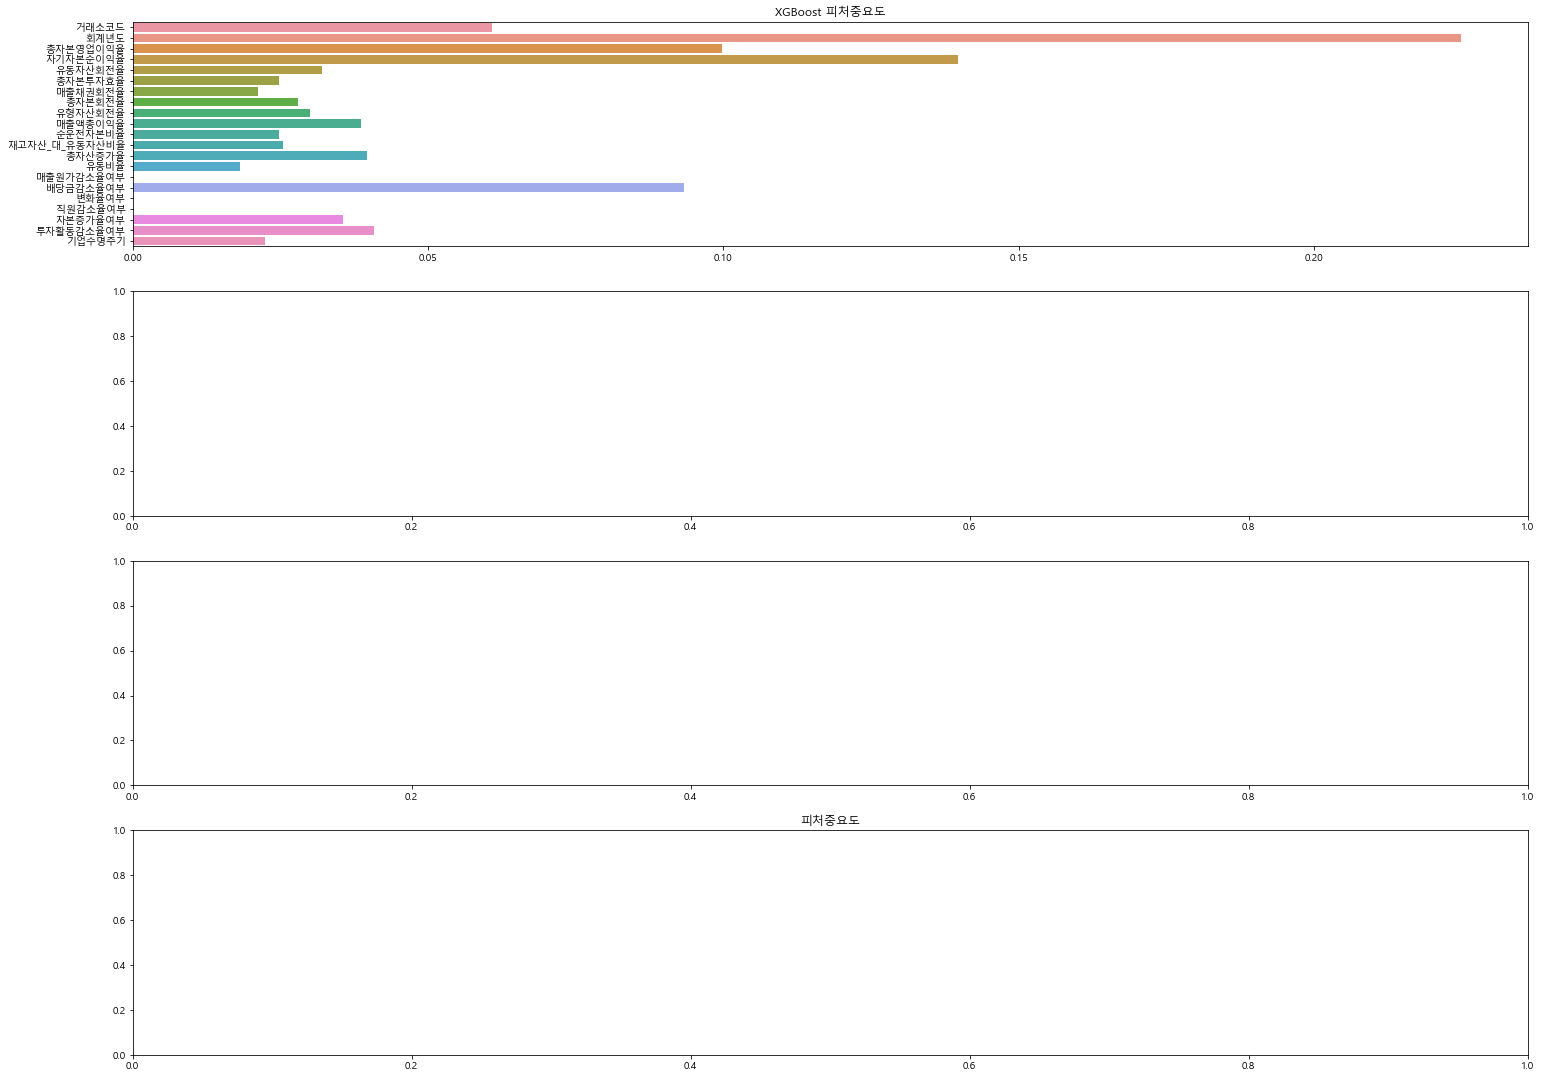

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(4, 1, squeeze=False)
fig.set_size_inches((25,19))

plt.title("피처중요도")
sns.barplot(x=xgb_wrapper.feature_importances_, y=ss_sc2.columns, ax=axes[0,0])
axes[0,0].title.set_text("XGBoost 피처중요도")
sns.barplot(x=lgb_cr.feature_importances_, y=ss_sc2.columns, ax=axes[1,0])
axes[1,0].title.set_text("LGBM 피처중요도")
sns.barplot(x=rf_clf.feature_importances_, y=ss_sc2.columns, ax=axes[2,0])
axes[2,0].title.set_text("Random Forest 피처중요도")
#sns.barplot(x=lg1.feature_importances_, y=ss_sc2.columns, ax=axes[3,0])
#axes[3,0].title.set_text("LogisticRegression 피처중요도")

plt.show()

### 스태킹 앙상블

In [ ]:
stacking = np.array([predictions, predictions_rf, w_preds])
stacking.shape

(3, 3143)

In [ ]:
stacking = np.transpose(stacking)
stacking.shape

(3143, 3)

In [ ]:
stacking[:10]

array([[0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1]], dtype=int64)

In [ ]:
lgb_cr.fit(stacking, y_test)
lgb_pred = lgb_cr.predict(stacking)
get_clf_eval(y_test, lgb_pred)

오차 행렬
[[3090    0]
 [  53    0]]
정확도: 0.9831, 정밀도: 0.0000, 재현율: 0.0000, f1: 0.0000


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = TimeSeriesSplit(n_splits=n_folds)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
# CV스태킹 알고리즘 각 모델에 적용
lg_train, lg_test = get_stacking_base_datasets(gs, x_train_ada, y_train_ada, x_test, 5)
rf_train, rf_test = get_stacking_base_datasets(rf_gs, x_train_ada, y_train_ada, x_test, 5)
dt_train, dt_test = get_stacking_base_datasets(xgb_grid, x_train_ada, y_train_ada, x_test,  5)    
# ada_train, ada_test = get_stacking_base_datasets(ada_clf, x_train_ada, y_train_ada, x_test, 5)

# CV스태킹 알고리즘 결과로 메타 모델 학습/시험에 필요한 result_a result_b 만들기 
Stack_final_X_train = np.concatenate((lg_train, rf_train, dt_train),axis=1)
Stack_final_X_test = np.concatenate((lg_test, rf_test, dt_test), axis=1)

# 메타 모델 학습
lgb_clf.fit(Stack_final_X_train, y_train)
stack_final = lgb_clf.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

GridSearchCV  model 시작 
	 폴드 세트:  0  시작 


KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822],\n           dtype='int64', length=1823)] are in the [columns]"